In [19]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from tools.Math import gdt, hess


# define a test function
t = sp.Symbol("t")
phi_ex = t**3 - 2*t + 1
phi_ex

t**3 - 2*t + 1

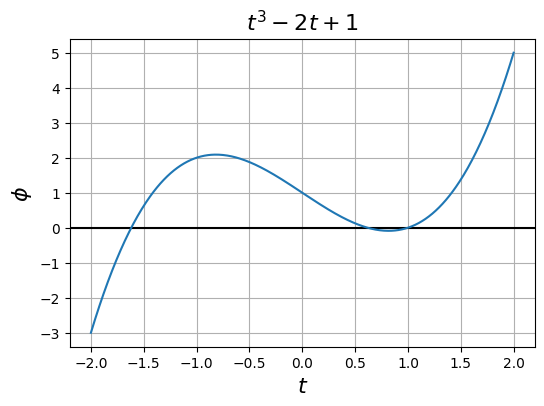

In [20]:
# define a 1-d function drawer
def vis_func_1d(phi, t, t1=-3, t2=3, points=500):
    phi_cal = sp.lambdify(t, phi)
    ts = np.linspace(t1, t2, points)
    phis = phi_cal(ts)

    plt.figure(figsize=(6, 4))
    plt.title(f"${sp.latex(phi)}$", fontsize=16)
    plt.ylabel("$\phi$", fontsize=16)
    plt.xlabel("$t$", fontsize=16)

    plt.grid(True)
    plt.axhline(y=0, color="k")
   # plt.axvline(x=0, color="k")
    plt.plot(ts, phis)

    # plt.show() does not put here for plot expanding the code if you need 


vis_func_1d(phi_ex, t, t1=-2, t2=2)
plt.show()

## 

## Step Incrementing Search Method
  * **Form of the problem** \
    Let 1-d search opotimal problem be:
    $$
    \min_{0 \le t \le t_{\max}} \phi(t) 
    $$
    We want to find a closed search interval:
    $$
    [a,b] \subset [0, t_{\max}] , \quad and \quad t^* \in [a,b]
    $$

In [21]:
# Step incrementing search method
def sism(phi, t_var, t0=0, tmax=np.inf, h0=0.5, alpha=2, vis_data=False):
    """Step incrementing search method
    phi: function you want to search;
    t_var: function's variable;
    t0: initial point for searching;
    tmax: upper boundary of initial interval;
    h0: initial step length, default to be 0.5;
    alpha: coefficient for increasing step
    vis_data: if True, this function will return data of every step"""
    # step 1: init
    phi_cal = sp.lambdify(t_var, phi)
    k = 0                             # iteration
    hk = h0
    tk = t0
    c1 = c2 = None                    # candidates for final interval
    phi_val_k = phi_cal(tk)           # value of tk
    ks = []                           # record for (t, phi_val), this is used to visualize
    kp1s = []
    cs = []                           # record for (c1, c2) at each iteration
    while True:
        # step 2: compare
        tkp1 = max(tk + hk, 0)                # t at k plus 1
        phi_val_kp1 = phi_cal(tkp1)
        c2 = tkp1
        # record
        ks.append((tk, phi_val_k))
        kp1s.append((tkp1, phi_val_kp1))
        if phi_val_k > phi_val_kp1:
            # step 3: increase step length
            c1 = tk
            tk, phi_val_k = tkp1, phi_val_kp1
            hk = alpha * hk
        else:
            if k == 0:
                # step 3: reverse direction of step
                hk = -hk
                c1 = tkp1
            else:
                # step 3: finish
                a = min(c1, c2)
                b = max(c1, c2)
                cs.append((c1, c2))
                break
        k += 1
        cs.append((c1, c2))
    
    if vis_data:
        return (a, b), ks, kp1s, cs
    return (a, b)

In [22]:
# visualization for sism
def vis_sism(phi, t_var, ks, kp1s, cs):
    tks = [k[0] for k in ks]
    phi_val_ks = [k[1] for k in ks]
    tkp1s = [kp1[0] for kp1 in kp1s]
    phi_val_kp1s = [kp1[1] for kp1 in kp1s]
    for k in range(len(tks)):
        vis_func_1d(phi, t_var, t1=0, t2=max(tkp1s[:k+1]))
        plt.plot(tks[:k], phi_val_ks[:k], "ko")
        plt.plot(tkp1s[:k], phi_val_kp1s[:k], "ko")
        plt.plot(cs[k][0], 0, "bo")
        plt.plot(cs[k][1], 0, "bo")

        plt.plot(tks[k], phi_val_ks[k], "rs")
        plt.plot(tkp1s[k], phi_val_kp1s[k], "gs")

        height = max(phi_val_ks[k], phi_val_kp1s[k])
        plt.plot([tks[k], tks[k]], [0, phi_val_ks[k]], "r:")
        plt.plot([tkp1s[k], tkp1s[k]], [0, height], "g:")
        plt.annotate('', xy=(tkp1s[k], phi_val_ks[k]), xytext=(tks[k], phi_val_ks[k]),
                     arrowprops=dict(facecolor='blue', shrink=0.05))


        # iteration info
        print(f"Iteration {k}")
        print(f"(t{k}, phi{k}): {round(tks[k], 3), round(phi_val_ks[k], 3)}")
        print(f"(t{k}p1, phi{k}p1): {round(tkp1s[k], 3), round(phi_val_kp1s[k], 3)}")
        print(f"(c1, c2): {round(cs[k][0], 3), round(cs[k][1], 3)}")
        
        plt.show()

Test for step incrementing search method: 
t0=0, h0=0.2, alpha=2

Iteration 0
(t0, phi0): (0, 1)
(t0p1, phi0p1): (0.2, 0.608)
(c1, c2): (0, 0.2)


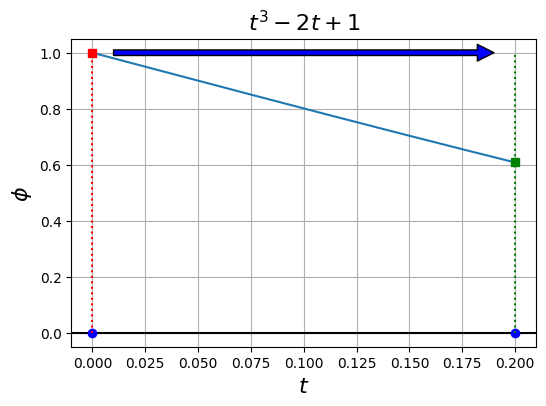

Iteration 1
(t1, phi1): (0.2, 0.608)
(t1p1, phi1p1): (0.6, 0.016)
(c1, c2): (0.2, 0.6)


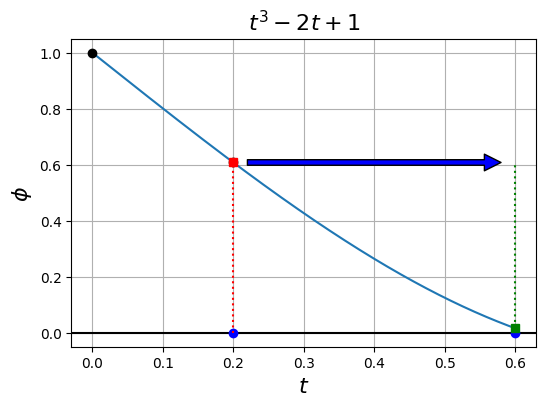

Iteration 2
(t2, phi2): (0.6, 0.016)
(t2p1, phi2p1): (1.4, 0.944)
(c1, c2): (0.2, 1.4)


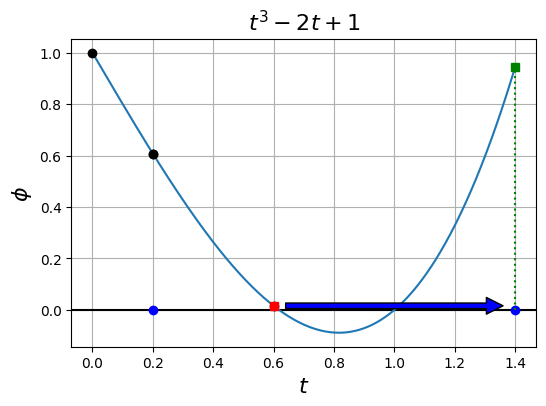

finial interval: [0.2, 1.4]


In [118]:
# test for step incrementing search method
# test0: t0=0, h0=0.5
# test1: t0=1, h0=0.5
# test2: t0=0, h0=0.1
# test3: t0=1, h0=0.1
# test ...
t0 = 0
h0 = 0.2
alpha = 2
print(f"Test for step incrementing search method: \nt0={t0}, h0={h0}, alpha={alpha}\n")

interval, ks, kp1s, cs = sism(phi_ex, t, t0=t0, h0=h0, alpha=alpha, vis_data=True)
vis_sism(phi_ex, t, ks, kp1s, cs)

print(f"finial interval: [{round(interval[0], 3)}, {round(interval[1], 3)}]")

## Bisection Method
 * Find local minimum

In [24]:
def bisection(phi, t_var, tol=10e-2, vis_data=False):
    phi_d = gdt(phi, [t_var])[0]
    phi_d_cal = sp.lambdify(t_var, phi_d)
    # visualization data
    As = []         # (a, phi_d_cal(a))
    Bs = []
    Ms = []

    # step 1: find a search interval
    a, b = sism(phi, t_var)
    while True:
        # step 2: calculate midpoint
        m = (a + b) / 2
        # step 3: update interval
        phi_d_a, phi_d_b, phi_d_m = phi_d_cal(a), phi_d_cal(b), phi_d_cal(m)        # record
        As.append((a, phi_d_a)), Bs.append((b, phi_d_b)), Ms.append((m, phi_d_m))
        if phi_d_m < 0: 
            a = m
        elif phi_d_m > 0:
            b = m
        else:
            break
        # step 4: termination check
        if abs(a - b) < tol:
            phi_d_a, phi_d_b = phi_d_cal(a), phi_d_cal(b)
            As.append((a, phi_d_a)), Bs.append((b, phi_d_b))
            break
    t_opt = (a + b) / 2
    Ms.append((t_opt, phi_d_cal(t_opt)))
    if vis_data:
        return t_opt, As, Bs, Ms, phi_d   
    return t_opt 

In [25]:
# visualization for bisection method
def vis_bisection(phi_d, t_var, As, Bs, Ms):
    aks = [a[0] for a in As]
    phi_d_as = [a[1] for a in As]
    bks = [b[0] for b in Bs]
    phi_d_bs = [b[1] for b in Bs]
    mks = [m[0] for m in Ms]
    phi_d_ms = [m[1] for m in Ms]
    for k in range(len(aks)):
        vis_func_1d(phi_d, t_var, t1=aks[k], t2=bks[k])
        plt.plot(aks[k], 0, "ko")
        plt.plot(bks[k], 0, "ko")
        color = "g" if k != len(aks)-1 else "r"
        plt.plot(mks[k], 0, color+"o")

        plt.plot([aks[k], aks[k]], [0, phi_d_as[k]], "k:")
        plt.plot([bks[k], bks[k]], [0, phi_d_bs[k]], "k:")
        plt.plot([mks[k], mks[k]], [0, phi_d_ms[k]], color+":")

        # iteration info 
        print(f"Iteration {k}:")
        print(f"(a, m, b): {round(aks[k], 3), round(mks[k], 3), round(bks[k], 3)}")

        plt.show()

Test for bisection method: 

Iteration 0:
(a, m, b): (0, 0.75, 1.5)


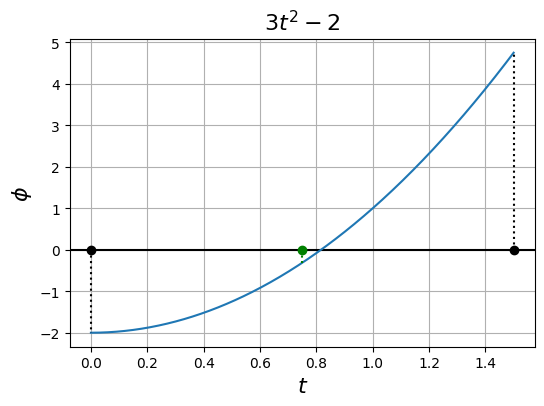

Iteration 1:
(a, m, b): (0.75, 1.125, 1.5)


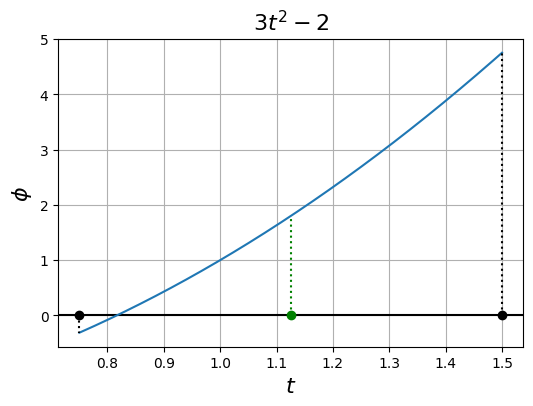

Iteration 2:
(a, m, b): (0.75, 0.938, 1.125)


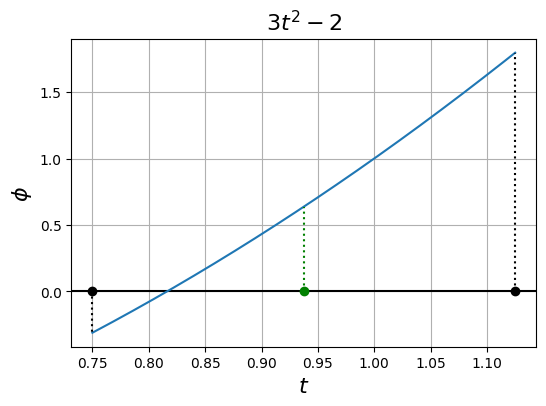

Iteration 3:
(a, m, b): (0.75, 0.844, 0.938)


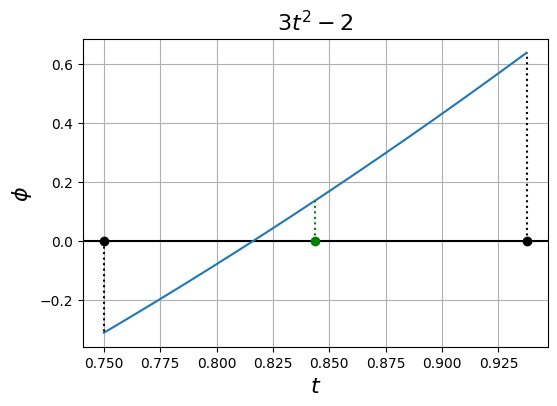

Iteration 4:
(a, m, b): (0.75, 0.797, 0.844)


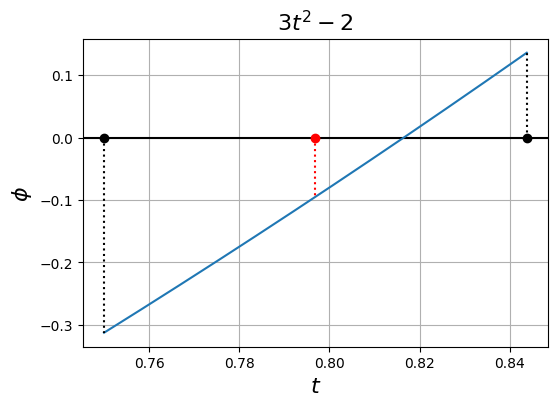

optimal point: 0.796875


In [26]:
# test for Bisection method
print(f"Test for bisection method: \n")
t_opt, As, Bs, Ms, phi_d = bisection(phi_ex, t, tol=10e-2, vis_data=True)
vis_bisection(phi_d, t, As=As, Bs=Bs, Ms=Ms)
print(f"optimal point: {t_opt}")

## Newton's method

In [27]:
def newton(phi, t_var, tol=10e-2, vis_data=False):
    phi_d = gdt(phi, [t_var])[0]
    phi_dd = hess(phi, [t_var])[0]
    phi_d_cal = sp.lambdify(t_var, phi_d)
    phi_dd_cal = sp.lambdify(t_var, phi_dd)
    # visualization data
    ks = []         # (tk, phi_d_cal(tk))

    # step 1: find a search interval
    a, b = sism(phi, t_var)
    # step 2: find a initial t0
    tk = b
    while True:
        ks.append((tk, phi_d_cal(tk)))
        # step 3: update point using tangent of tk
        tkp1 = tk - phi_d_cal(tk)/phi_dd_cal(tk)
        # step 4: termination check
        if abs(tkp1 - tk) < tol:
            break
        tk = tkp1
    t_opt = tkp1
    ks.append((tkp1, phi_dd_cal(tkp1)))
    if vis_data:
        return t_opt, ks, phi_d   
    return t_opt 

In [28]:
# vis for newton's method
def vis_newton(phi_d, t_var, ks):
    tks = [tk[0] for tk in ks]
    phi_d_tks = [tk[1] for tk in ks]
    for k in range(len(tks)-1):
        vis_func_1d(phi_d, t_var, t1=tks[-1], t2=tks[k])

        plt.plot(tks[k], 0, "ko")
        color = "g" if k+1 != len(tks)-1 else "r"
        plt.plot(tks[k+1], 0, color+"o")

        plt.plot([tks[k], tks[k+1]], [phi_d_tks[k], 0], color+"-")
        plt.plot([tks[k], tks[k]], [phi_d_tks[k], 0], "k:")

        # Itertation info
        print(f"Iteration {k}: ")
        print(f"(tk, tkp1): {round(tks[k], 3), round(tks[k+1], 3)}")

        plt.show()
        

Test for newton's method: 

Iteration 0: 
(tk, tkp1): (1.5, 0.972)


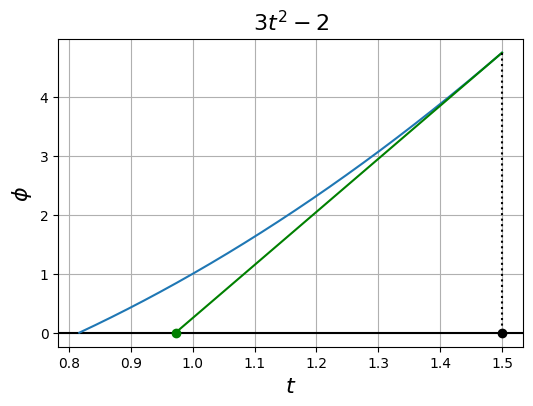

Iteration 1: 
(tk, tkp1): (0.972, 0.829)


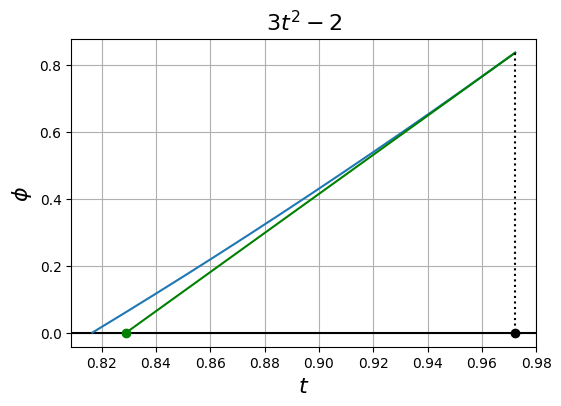

Iteration 2: 
(tk, tkp1): (0.829, 0.817)


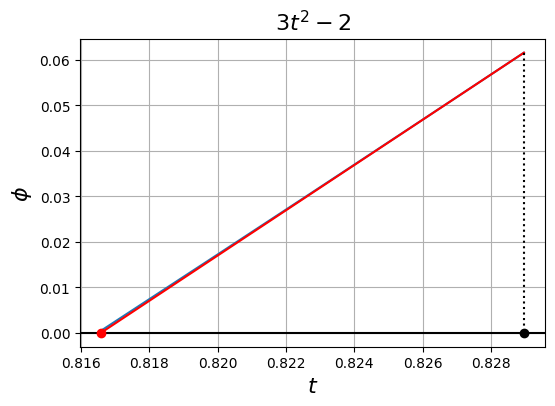

optimal point: 0.8165903979271619


In [29]:
# test for newton's method
print("Test for newton's method: \n")
t_opt, ks, phi_d = newton(phi_ex, t, tol=10e-2, vis_data=True)
vis_newton(phi_d, t, ks)
print(f"optimal point: {t_opt}")

## Golden Section Method

In [30]:
def goldenS(phi, t_var, beta=0.318, tol=10e-2, vis_data=False):
    phi_cal = sp.lambdify(t_var, phi)
    # visualization data
    As = []             # (a, phi_cal(a))
    Bs = []
    T1s = []
    T2s = []

    # step 1: find a search interval
    a, b = sism(phi, t_var)
    while True:
        # step 2: calculate section points t1, t2
        t2 = a + beta*(b - a) 
        t1 = a + b - t2
        phi_t1 = phi_cal(t1)
        phi_t2 = phi_cal(t2)
        As.append((a, phi_cal(a))), Bs.append((b, phi_cal(b)))   # record
        T1s.append((t1, phi_t1)), T2s.append((t2, phi_t2))
        # step 3: termination check
        if abs(t2 - t1) < tol:
            break
        # step 4: update interval
        if phi_t1 < phi_t2: 
            a = t2
        elif phi_t1 > phi_t2:
            b = t1
        else:
            break
    t_opt = (t1 + t2) / 2
    if vis_data:
        return t_opt, As, Bs, T1s, T2s   
    return t_opt 

In [31]:
# vis for 's method
def vis_goldenS(phi, t_var, t_opt, As, Bs, T1s, T2s):
    aks = [a[0] for a in As]
    phi_as = [a[1] for a in As]
    bks = [b[0] for b in Bs]
    phi_bs = [b[1] for b in Bs]
    t1s = [t1[0] for t1 in T1s]
    phi_t1s = [t1[1] for t1 in T1s]
    t2s = [t2[0] for t2 in T2s]
    phi_t2s = [t2[1] for t2 in T2s]

    for k in range(len(aks)):
        vis_func_1d(phi, t_var, t1=aks[k], t2=bks[k])

        plt.plot(aks[k], phi_as[k], "ko")
        plt.plot(bks[k], phi_bs[k], "ko")
        plt.plot(t1s[k], phi_t1s[k], "go")
        plt.plot(t2s[k], phi_t2s[k], "bo")

        plt.plot([aks[k]]*2, [phi_as[k], 0], "k:")
        plt.plot([bks[k]]*2, [phi_bs[k], 0], "k:")
        plt.plot([t1s[k]]*2, [phi_t1s[k], 0], "g:")
        plt.plot([t2s[k]]*2, [phi_t2s[k], 0], "b:")
        
        if k == len(aks)-1:
            plt.plot(t_opt, 0, "ro")

        # Itertation info
        print(f"Iteration {k} ")
        print(f"(a{k}, phi_a{k}): {round(aks[k], 3), round(phi_as[k], 3)}")
        print(f"(b{k}, phi_b{k}): {round(bks[k], 3), round(phi_bs[k], 3)}")
        print(f"(t2, phi_t2): {round(t2s[k], 3), round(phi_t2s[k], 3)}")
        print(f"(t1, phi_t1): {round(t1s[k], 3), round(phi_t1s[k], 3)}")

        plt.show()
        

Test for golden section method: 

Iteration 0 
(a0, phi_a0): (0, 1)
(b0, phi_b0): (1.5, 1.375)
(t2, phi_t2): (0.477, 0.155)
(t1, phi_t1): (1.023, 0.025)


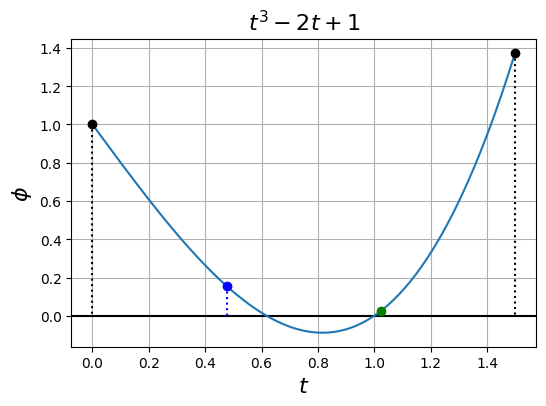

Iteration 1 
(a1, phi_a1): (0.477, 0.155)
(b1, phi_b1): (1.5, 1.375)
(t2, phi_t2): (0.802, -0.088)
(t1, phi_t1): (1.175, 0.272)


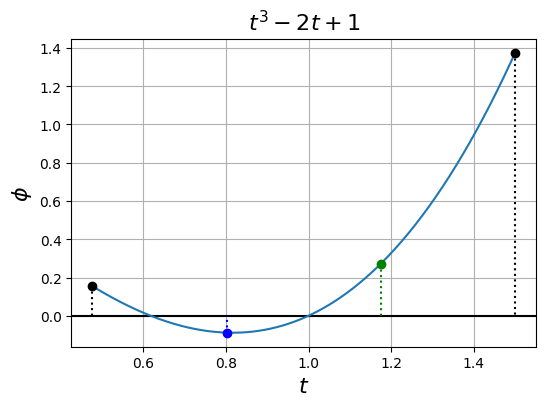

Iteration 2 
(a2, phi_a2): (0.477, 0.155)
(b2, phi_b2): (1.175, 0.272)
(t2, phi_t2): (0.699, -0.056)
(t1, phi_t1): (0.953, -0.041)


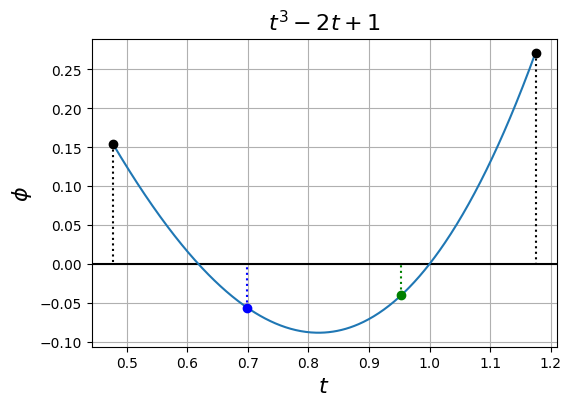

Iteration 3 
(a3, phi_a3): (0.477, 0.155)
(b3, phi_b3): (0.953, -0.041)
(t2, phi_t2): (0.628, -0.009)
(t1, phi_t1): (0.802, -0.088)


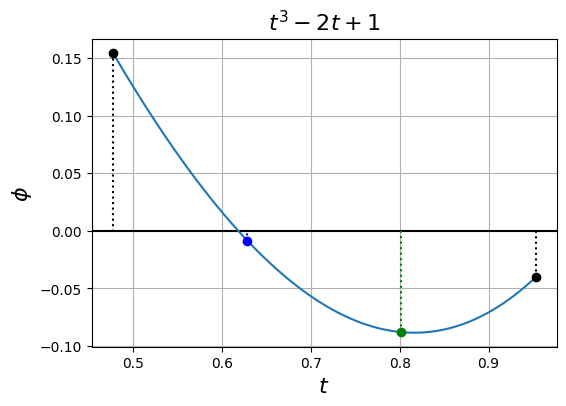

Iteration 4 
(a4, phi_a4): (0.628, -0.009)
(b4, phi_b4): (0.953, -0.041)
(t2, phi_t2): (0.732, -0.072)
(t1, phi_t1): (0.85, -0.086)


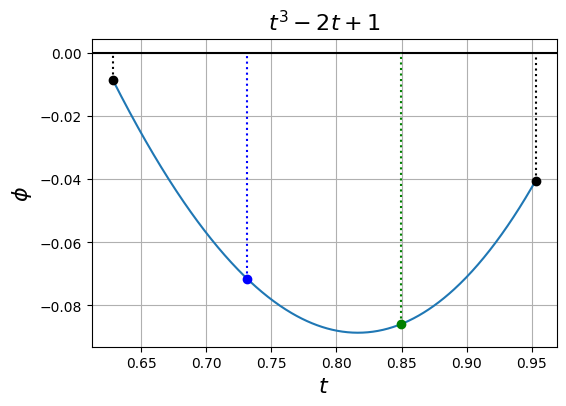

Iteration 5 
(a5, phi_a5): (0.732, -0.072)
(b5, phi_b5): (0.953, -0.041)
(t2, phi_t2): (0.802, -0.088)
(t1, phi_t1): (0.882, -0.078)


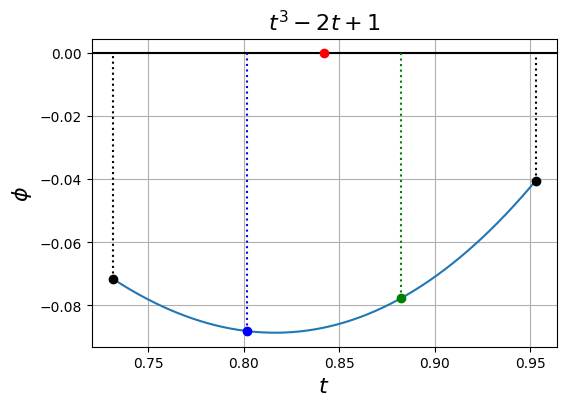

optimal point: 0.8421637704551759


In [32]:
# test for golden section method
# test0: beta=0.318
# test1: beta=0.4
print("Test for golden section method: \n")
t_opt, As, Bs, T1s, T2s  = goldenS(phi_ex, t, beta=0.318, tol=10e-2, vis_data=True)
vis_goldenS(phi_ex, t, t_opt, As, Bs, T1s, T2s)
print(f"optimal point: {t_opt}")

## Parabolic Interpolation

In [62]:
def paraInter(phi, t_var, tol=10e-2, vis_data=False):
    phi_cal = sp.lambdify(t_var, phi)
    T1s = []                        # (t1, phi_t1)
    T2s = []
    T0s = []
    a012s = []                      # (a0, a1, a2)
    T_hats = []                     # (t_hat, pih_t_hat)

    # step 1: init t0, t1, t2
    t1, t2 = sism(phi, t_var)
    t0 = (t1 + t2) / 2              # here should be a better way to init t0 (phi_t1>phi_t0, phi_t2>phi_t0)
    while True:
        # step 2: calculate approximate quadratic function
        phi_t0, phi_t1, phi_t2 = phi_cal(t0), phi_cal(t1), phi_cal(t2)
        # P(t)=a2*t^2 + a1*t + a0
        ts = np.array([
            [1, t0, t0**2],
            [1, t1, t1**2],
            [1, t2, t2**2]
        ])
        phis = np.array([
            [phi_t0],
            [phi_t1],
            [phi_t2]
        ])
        a012 = np.matmul(np.linalg.inv(ts), phis)
        a0, a1, a2 = a012[0,0], a012[1,0], a012[2,0]
        t_hat = - a1 / (2*a2)
        phi_t_hat = phi_cal(t_hat)

        # record
        T0s.append((t0, phi_t0)) 
        T1s.append((t1, phi_t1)) 
        T2s.append((t2, phi_t2))
        a012s.append((a0, a1, a2))
        T_hats.append((t_hat, phi_t_hat))
        # step 3: termination chech
        if abs(t_hat - t0) < tol:
            break
        # step 4: update interval
        if t0 < t_hat:
            if phi_t0 >= phi_t_hat:
                t1, t0 = t0, t_hat
            else:
                t2 = t_hat
        else:
            if phi_t0 >= phi_t_hat:
                t2, t0 = t0, t_hat
            else:
                t1 = t_hat
    t_opt = t_hat
    if vis_data:
        return t_opt, T0s, T1s, T2s, a012s, T_hats
    return t_opt       

In [115]:
# vis for paraInter
def vis_paraInter(phi, t_var, T0s, T1s, T2s, a012s, T_hats):
    t0s = [t0[0] for t0 in T0s]
    phi_t0s = [t0[1] for t0 in T0s]
    t1s = [t1[0] for t1 in T1s]
    phi_t1s = [t1[1] for t1 in T1s]
    t2s = [t2[0] for t2 in T2s]
    phi_t2s = [t2[1] for t2 in T2s]
    ths = [th[0] for th in T_hats]
    phi_ths = [th[1] for th in T_hats]
    Pts = [a012[2]*t_var**2 + a012[1]*t_var + a012[0]
           for a012 in a012s]
    for k in range(len(t0s)):
        ax = vis_funcs_1d([phi, Pts[k]], t_var, 
                          t1=t1s[k], t2=t2s[k], 
                          titles=[f"paraInter - iter {k}", "local image"],
                          styles=["c-", "m--"], labels=["$\phi$(t)", "$P(t)$"])

        for axi in ax:
            color = "m" if k != len(t0s)-1 else "r"

            axi.plot(t1s[k], phi_t1s[k], "ko")
            axi.plot(t2s[k], phi_t2s[k], "ko")
            axi.plot(t0s[k], phi_t0s[k], "co")
            axi.plot(ths[k], phi_ths[k], color+"o")

            axi.plot([t1s[k]]*2, [phi_t1s[k], 0], "k:")
            axi.plot([t2s[k]]*2, [phi_t2s[k], 0], "k:")
            axi.plot([t0s[k]]*2, [phi_t0s[k], 0], "c:")
            axi.plot([ths[k]]*2, [phi_ths[k], 0], color+":")
            

        
        a, b = min(t0s[k], ths[k]), max(t0s[k], ths[k])
        pa, pb = min(phi_t0s[k], phi_ths[k]), max(phi_t0s[k], phi_ths[k])
        ax[1].set_xlim(a - (b-a)/5, b + (b-a)/5)
        ax[1].set_ylim(pa - (pb-pa)/5, pb + (pb-pa)/5)

        # Itertation info
        print(f"Iteration {k} ")
        print(f"(t0, phi_t0): {round(t0s[k], 3), round(phi_t0s[k], 3)}")
        print(f"(t1, phi_t1): {round(t1s[k], 3), round(phi_t1s[k], 3)}")
        print(f"(t2, phi_t2): {round(t2s[k], 3), round(phi_t2s[k], 3)}")
        print(f"(th, phi_th): {round(ths[k], 3), round(phi_ths[k], 3)}")
        print(f"(a0, a1, a2): {round(a012s[k][0], 3), round(a012s[k][1], 3), round(a012s[k][2], 3)}")

        plt.show()


# define a 1-d function drawer, 
# it can draw more than two funcs in one graph, 
# and we can enlarge local image
def vis_funcs_1d(funcs, t, styles, labels, titles, t1, t2, points=500):
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    ts = np.linspace(t1, t2, points)

    for func, style, label in zip(funcs, styles, labels):
        func_cal = sp.lambdify(t, func)
        ys = func_cal(ts)
        for i, axi in enumerate(ax):
            axi.plot(ts, ys, style, label=label)
            axi.set_title(titles[i], fontsize=16)
            axi.set_ylabel("$y$", fontsize=16)
            axi.set_xlabel("$t$", fontsize=16)
            axi.grid(True)
            axi.axhline(y=0, color="k")
            axi.legend()
    plt.tight_layout()
    
    return ax

    # plt.show() does not put here for plot expanding the code if you need 

Test for golden section method: 

Iteration 0 
(t0, phi_t0): (0.75, -0.078)
(t1, phi_t1): (0, 1)
(t2, phi_t2): (1.5, 1.375)
(th, phi_th): (0.694, -0.054)
(a0, a1, a2): (1.0, -3.125, 2.25)


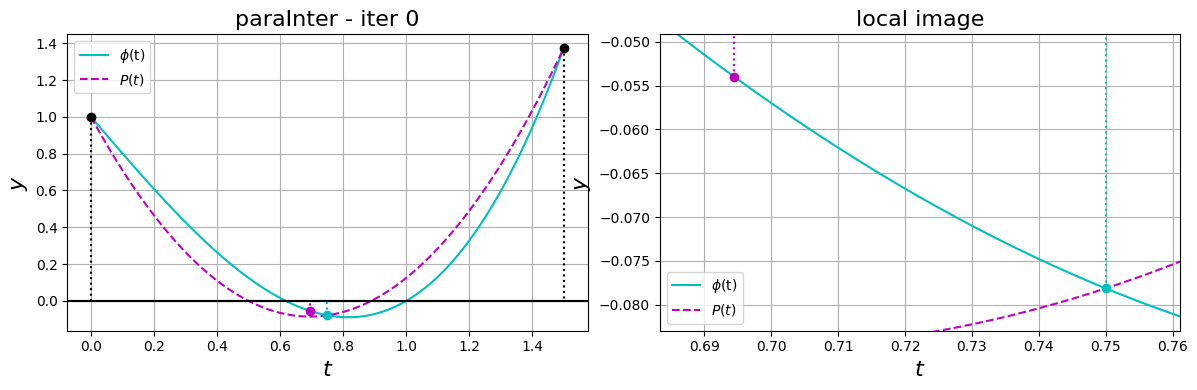

Iteration 1 
(t0, phi_t0): (0.75, -0.078)
(t1, phi_t1): (0.694, -0.054)
(t2, phi_t2): (1.5, 1.375)
(th, phi_th): (0.796, -0.088)
(a0, a1, a2): (1.781, -4.688, 2.944)


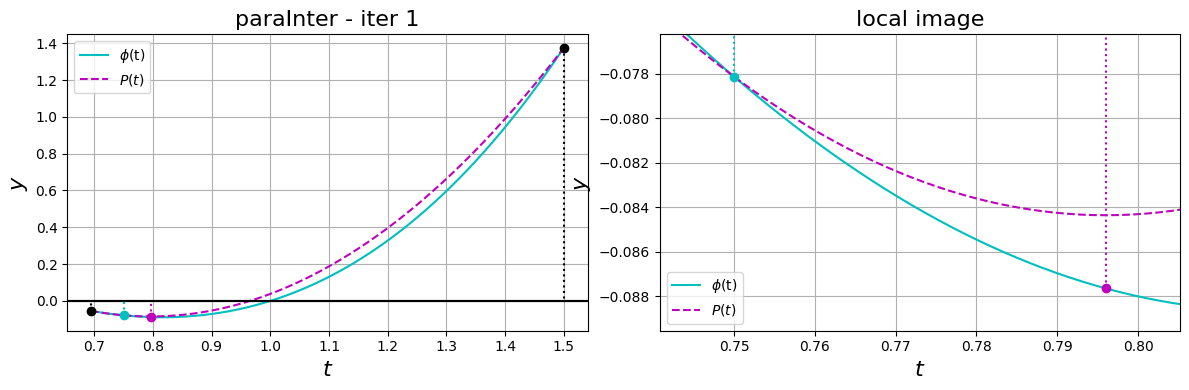

Iteration 2 
(t0, phi_t0): (0.796, -0.088)
(t1, phi_t1): (0.75, -0.078)
(t2, phi_t2): (1.5, 1.375)
(th, phi_th): (0.807, -0.088)
(a0, a1, a2): (1.895, -4.916, 3.046)


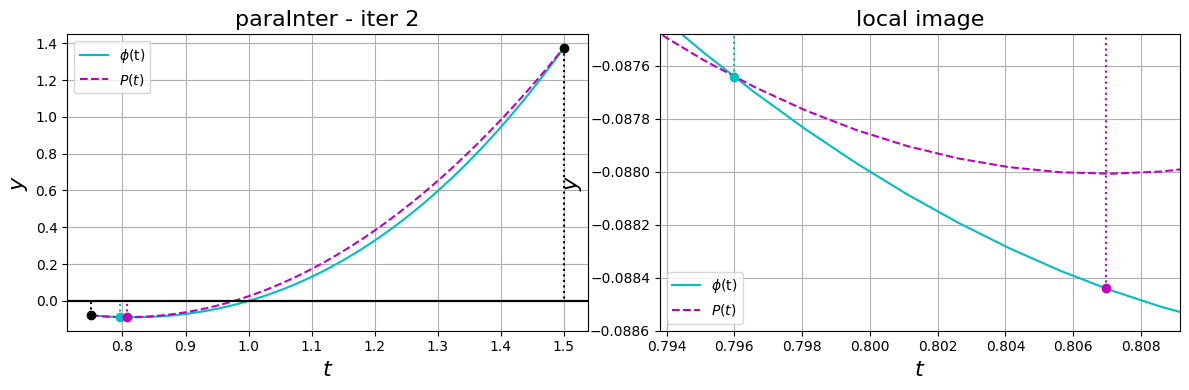

Iteration 3 
(t0, phi_t0): (0.807, -0.088)
(t1, phi_t1): (0.796, -0.088)
(t2, phi_t2): (1.5, 1.375)
(th, phi_th): (0.813, -0.089)
(a0, a1, a2): (1.963, -5.047, 3.103)


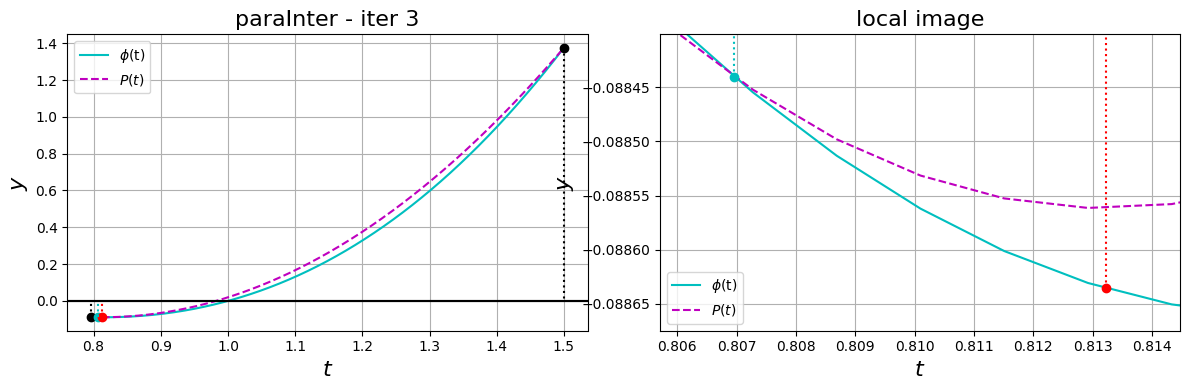

optimal point: 0.8132191593330326


In [116]:
print("Test for golden section method: \n")
t_opt, T0s, T1s, T2s, a012s, T_hats  = paraInter(phi_ex, t, tol=10e-3, vis_data=True)
vis_paraInter(phi_ex, t, T0s, T1s, T2s, a012s, T_hats)
print(f"optimal point: {t_opt}")